In [1]:
import numpy
from joblib import dump, load
import scipy.stats
import matplotlib.pyplot
%matplotlib inline

In [2]:
x = numpy.load('./data/x.npy')
y = numpy.load('./data/y.npy')

In [3]:
y_all_grid = numpy.linspace(-6, 2, 1024)
x_all_grid = numpy.linspace(50, 58, 1024)
xx_all, yy_all = numpy.meshgrid(x_all_grid, y_all_grid)

In [4]:
tmp_idx = (numpy.sqrt((x[:, 0] - 51.4545) ** 2 + (x[:, 1] + 2.5879) ** 2) <= 0.1)  

In [5]:
y_local_grid = numpy.linspace(-2.70, -2.45, 1024)
x_local_grid = numpy.linspace(51.3, 51.55, 1024)
xx_local, yy_local = numpy.meshgrid(x_local_grid, y_local_grid)

In [6]:
x_local = x[tmp_idx, :]
y_local = y[tmp_idx]

In [7]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [8]:
# mdl = GaussianProcessClassifier(kernel=1.0 * RBF(1.0), n_restarts_optimizer=1024, max_iter_predict=128, n_jobs=-1)
# mdl.fit(x_local, y_local)
# dump(mdl, './gp_mdl.joblib')

In [10]:
mdl = load('./gp_mdl.joblib')

In [11]:
p_local = mdl.predict_proba(numpy.hstack([xx_local.reshape(-1, 1), yy_local.reshape(-1, 1)]))[:, 1].reshape(1024, 1024)

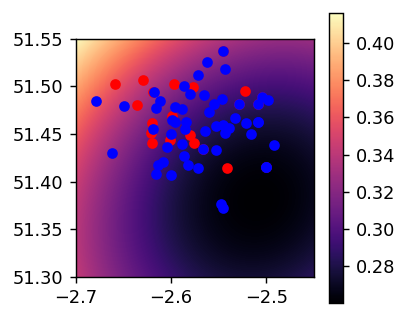

In [28]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_local.transpose(), origin='lower', cmap='magma',
                         extent=[-2.70, -2.45, 51.3, 51.55])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[(tmp_idx&(y==1)), 1], 
                       x[(tmp_idx&(y==1)), 0], 'ro', markersize=5.0)
matplotlib.pyplot.plot(x[(tmp_idx&(y==0)), 1], 
                       x[(tmp_idx&(y==0)), 0], 'bo', markersize=5.0)
matplotlib.pyplot.colorbar()
# matplotlib.pyplot.grid()
# matplotlib.pyplot.xlim([-2.7, -2.45])
# matplotlib.pyplot.ylim([51.3, 51.55])

In [29]:
p_all = mdl.predict_proba(numpy.hstack([xx_all.reshape(-1, 1), yy_all.reshape(-1, 1)]))[:, 1].reshape(1024, 1024)

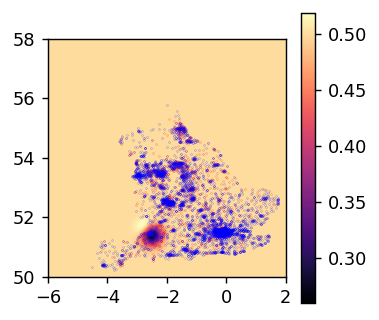

In [30]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_all.transpose(), origin='lower', cmap='magma',
                         extent=[-6, 2, 50, 58])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[y==1, 1], x[y==1, 0], 'ro', markersize=0.1)
matplotlib.pyplot.plot(x[y==0, 1], x[y==0, 0], 'bo', markersize=0.1)
matplotlib.pyplot.xlim([-6, 2])
matplotlib.pyplot.ylim([50, 58])
matplotlib.pyplot.colorbar()

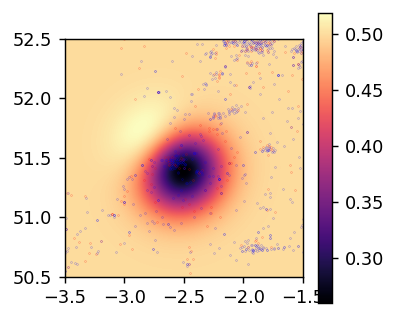

In [31]:
matplotlib.pyplot.figure(dpi=128, figsize=(3, 3))
matplotlib.pyplot.imshow(p_all.transpose(), origin='lower', cmap='magma',
                         extent=[-6, 2, 50, 58])#, vmin=0, vmax=1)
matplotlib.pyplot.plot(x[y==1, 1], x[y==1, 0], 'ro', markersize=0.1)
matplotlib.pyplot.plot(x[y==0, 1], x[y==0, 0], 'bo', markersize=0.1)
matplotlib.pyplot.xlim([-3.5, -1.5])
matplotlib.pyplot.ylim([50.5, 52.5])
matplotlib.pyplot.colorbar()